In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

Import the dataset

In [2]:
dataset = pd.read_csv('wikigraph_reduced.csv', sep='\t', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1")

In [3]:
dataset.head()

,Unnamed: 0,0,1
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222


In [4]:
dataset.columns

Index(['Unnamed: 0', '0', '1'], dtype='object')

Change the columns name; 0 is the **source** and 1 is the **target**

In [5]:
dataset.columns=['Index','Source','Target']

Make the first column the index

In [6]:
dataset.set_index('Index' , inplace = True)

In [7]:
dataset.head()

,Source,Target
Index,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


### RQ1. Create the graph
Create two dictionaries for the nodes of the graph; one is for the indegree node, the other one is for the outdegree node. Note that the dictionaries contain the unique element.

In [8]:
in_degree = {v: [] for v in set(dataset.Source)}
out_degree = {v: [] for v in set(dataset.Target)}

In [9]:
for row in dataset.iterrows():
    source = row[1][0]
    target = row[1][1]
    in_degree[source].append(target)
    out_degree[target].append(source)

In [10]:
in_degree[108]

[1059989, 1062426, 1161925]

Visualize how many indegree and outdegree has the graph

In [11]:
n_art_outlink = len(out_degree)
print(n_art_outlink)

75467


In [12]:
n_art_inlink = len(in_degree)
print(n_art_inlink)

90920


#### Is the graph directed?

In [13]:
if (len(set(dataset.Source).intersection(set(dataset.Target)))!=0):
     print ('The graph is directed')
    

The graph is directed


#### How many articles are we considering?

In [14]:
nodes = set(dataset.Source).union(set(dataset.Target))
n_nodes = len(nodes)
print(n_nodes)

98343


#### How many hyperlinks between pages exist?

In [15]:
n_edges = len(dataset)
print(n_edges)

483094


#### Compute the average number of links in an arbitrary page

In [16]:
import numpy as np

n_outlinks = []
for node in nodes:
    try:
        out_deg = len(out_degree[node])
    except:
        out_deg = 0
    n_outlinks.append(out_deg)
avg_outlink = np.mean(n_outlinks)
print(round(avg_outlink))

5


#### What is the graph density?
For directed graph the density is given by: $\frac{|E|}{|V|(|V|-1)}$



In [17]:
density = (n_edges/(n_nodes*(n_nodes-1)))
print(density)

4.9951571365597335e-05


#### The graph is dense or sparse?

In [18]:
print('Max number of edges:',n_nodes**2)
print('Number of edges: ',n_edges)

Max number of edges: 9671345649
Number of edges:  483094


The graph is sparse.

#### Visualize the nodes' degree distribution [To complete]

In [19]:
connections = []
for node in nodes:
    try:
        in_deg = len(in_degree[node])
    except:
        in_deg = 0
    try:
        out_deg = len(out_degree[node])
    except:
        out_deg = 0
    connections.append(in_deg+out_deg)

In [20]:
series=pd.Series(connections)

degrees=series.groupby(by=connections).count()
d_sum=np.sum(degrees)
degrees=degrees[0:50]   # the first 50 degrees values are enough to give a true representation
degrees=degrees/d_sum


degrees_sum=0

cdf_list=[]


for x in degrees:
    
    
    degrees_sum=(degrees_sum+x)
    
    
    cdf_list.append(degrees_sum)
    

<BarContainer object of 50 artists>

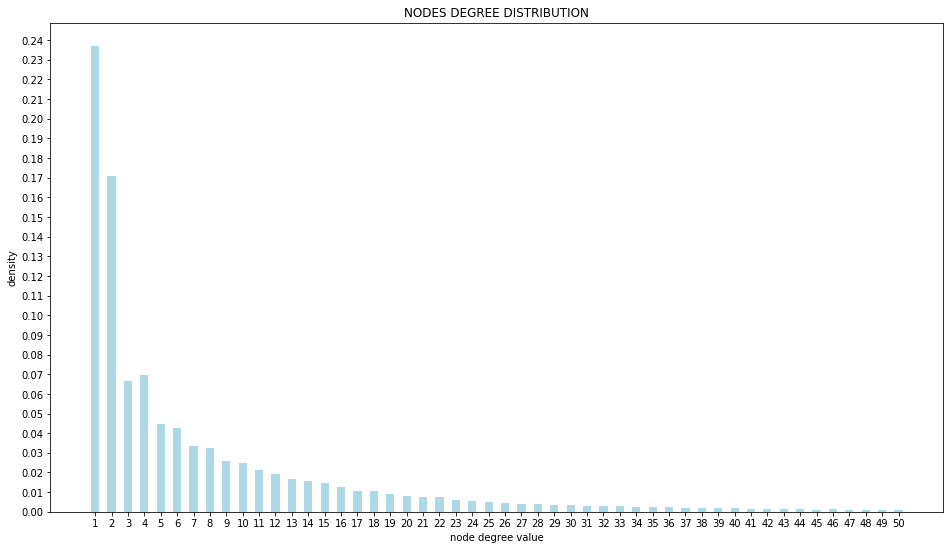

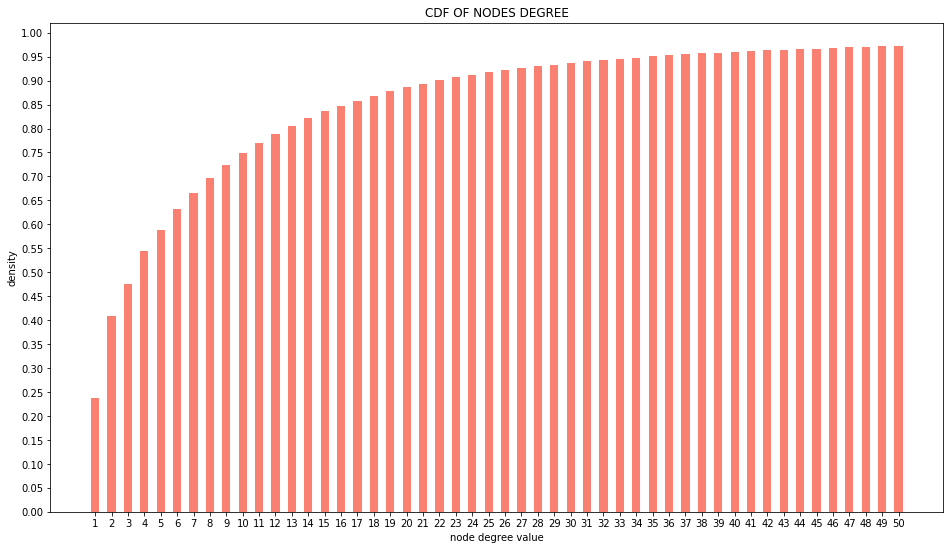

In [25]:
plt.figure(figsize=(16,9))

plt.xticks(np.arange(1,51,1))

plt.yticks(np.arange(0,1,0.01))

plt.xlabel('node degree value')

plt.ylabel('density')

plt.title('nodes degree distribution'.upper())

plt.bar(degrees.index,degrees,color='lightblue',width=0.5)








plt.figure(figsize=(16,9))

plt.xticks(np.arange(1,51,1))

plt.yticks(np.arange(0,1.05,0.05))

plt.xlabel('node degree value')

plt.ylabel('density')

plt.title('CDF of nodes degree'.upper())

plt.bar(degrees.index,cdf_list,color='salmon',width=0.5)




**transforming files**

In [135]:
f_pages=open('wiki-topcats-page-names.txt','r')
names=list(f_pages.readlines())

In [136]:
f_cat=open('wiki-topcats-categories.txt','r')
cat=list(f_cat.readlines())

In [137]:
def text_fix(names):
    
    for i in range(len(names)):
        
        names[i]=re.sub('\n','',names[i])
        
        names[i]=re.sub(f'^{str(i)}','',names[i]).lstrip()
        
    return names


In [138]:
page_names=text_fix(names)

In [179]:
#page_names

In [140]:
d={}


for i in range(0,len(cat)):

    support_list=cat[i].split(' ')
    
    support_list[-1]=support_list[-1][0:-2]
    
    key=support_list[0][9:-1]
    
    d[key]=support_list[1:]
    
#print(d)

## RQ4

**in the following cells the two categories for the subgraph are asked in input**

In [166]:

stop=False

while stop==False:
    
    cat_1=input('insert the first category')
    
    
    
    cat_2=input('insert the second category')
    
    

    if cat_1 and cat_2 in d.keys():
    
        all_pages=list(set(d[cat_1]).union(set(d[cat_2])))
        
        stop=True
        
    else:
        
        print('please insert exixsting categories')
    
    
    

    

insert the first category2002_FIFA_World_Cup_players
insert the second categoryEverton_F.C._players


In [143]:
all_pages.sort()

**all the pages which belong to the subgraph**

In [167]:
#all_pages

**creating the subgraph**

In [146]:
d_sg_in={}

d_sg_out={}

for page in all_pages:
    
    try:
    
        d_sg_in[int(page)]=in_degree[int(page)]
        
        d_sg_out[int(page)]=out_degree[int(page)]
        
    except KeyError:
        
        d_sg_in[int(page)]=[]
        
        d_sg_out[int(page)]=[]
    


In [168]:
#d_sg_in

In [169]:
pages_subset=[]

for page in all_pages:
    
    pages_subset.append(page_names[int(page)].lower())

#pages_subset

**the following script is to ask in input the pages to search for(test5)**

In [150]:
flag=False

page_first=0

page_second=0

while flag==False:

    first_page=input('insert the first page '.lower())
    second_page=input('insert the second page '.lower())
    
    if first_page and second_page in pages_subset:
        
        for idx in range(len(pages_subset)):
        
        
            if first_page==pages_subset[idx]:
            
                first_page_1=int(all_pages[idx])
            
            elif second_page==pages_subset[idx]:
            
                second_page_1=int(all_pages[idx])
        
        flag=True
        
print('the index number for the ', first_page,'page is',first_page_1)
print('the index number for the ', second_page, 'page is',second_page_1)



insert the first page tony meola
insert the second page preki
the index number for the  tony meola page is 1005156
the index number for the  preki page is 1005218


**calculating the set of links to remove, using BFS**

In [152]:
def links_distance(subgraph,start_vertex,end_vertex):

    layers={}
    
    queue=[]

    queue.append(start_vertex)

    distances={}
    
    distances[start_vertex]=0

    visited={vertex:False for vertex in subgraph.keys()}
    
    visited[start_vertex]=True

    
    if len(subgraph[start_vertex])==0:
        
        return 'the first page has no connections among the pages of the two categories considered'
    
    
    
    while not len(queue)==0:
    
        count=0
        
        vertex=queue.pop(0)
        
        
        
        
        layers[vertex]=[]
        
        
        
        for neighbour in subgraph[vertex]:
            
            
            
            
            if neighbour==end_vertex:
                
                node=list(layers.keys())[-1]
                
                nodes=[node]
                
                while node!=start_vertex:
                    
                    for key,values in layers.items():
                        
                        if node in values:
                            
                            node=key
                            
                            nodes.append(node)
                        

                return print('the minimum set of pages to be removed','\n',
                'in order to disconnect the two pages is','\n',nodes[:-1])
        
            
            
            
            
            try:
                
                
                if visited[neighbour]==False:
                
                    
                    
                    
                    visited[neighbour]=True
            
                    distances[neighbour]=distances[vertex]+1
            
                    queue.append(neighbour)
                
                    layers[vertex].append(neighbour)
                    
                    
                
                    
            
            
            except KeyError:
                
                
                count+=1
                
                if count==len(subgraph[vertex]):
                    
                    return 'it is impossible to reach from the first page the second page'
                
                
                
       
            

            
            



test1

In [154]:
links_distance(d_sg_in,81508,82342)

the minimum set of pages to be removed 
 in order to disconnect the two pages is 
 [81759]


In [155]:
d_sg_in[81508]

[79405, 81130, 81248, 81511, 81759, 81856, 81868, 81940, 82069, 82891, 83088]

In [156]:
d_sg_in[81759]

[77900,
 81508,
 81760,
 81761,
 81784,
 81787,
 81846,
 81856,
 81875,
 81928,
 81934,
 82049,
 82089,
 82342,
 82350,
 82400,
 82479,
 82759,
 82768,
 82878,
 83290,
 83464,
 85864,
 88804]

test2

In [157]:
links_distance(d_sg_in,81507,82341)

the minimum set of pages to be removed 
 in order to disconnect the two pages is 
 [81940, 81510]


In [158]:
d_sg_in[81507]

[81506,
 81510,
 81563,
 81582,
 81931,
 81934,
 82064,
 82089,
 82343,
 82345,
 82354,
 82588,
 82886,
 83082,
 85492,
 87009]

In [159]:
d_sg_in[81510]

[81619, 81940, 82345, 86907]

In [160]:
d_sg_in[81940]

[80625,
 81111,
 81946,
 82041,
 82051,
 82064,
 82322,
 82341,
 82414,
 82729,
 82891,
 82970,
 84284,
 87474,
 87589,
 87684,
 89978]

test3

In [161]:
links_distance(d_sg_in,1005289,1005160)

'the first page has no connections among the pages of the two categories considered'

In [162]:
d_sg_in[1005289]

[]

test4

In [163]:
#d_sg_in

In [378]:
links_distance(d_sg_in,81507,1005256)

'it is impossible to reach from the first page the second page'

test 5:test using input pages names

In [153]:
links_distance(d_sg_in,first_page_1,second_page_1)

'the first page has no connections among the pages of the two categories considered'

## RQ5(to be completed)

In [170]:
categories=list(d.keys())
#categories

In [171]:
input_cat=input('insert a category')

insert a categoryEverton_F.C._players


In [172]:
#in_degree

In [173]:
#d

In [70]:
def category_distance(subgraph,start_vertex,end_vertex):

    
    
    queue=[]

    queue.append(start_vertex)

    distances={}
    
    distances[start_vertex]=0

    visited={vertex:False for vertex in subgraph.keys()}
    
    visited[start_vertex]=True

    
    if len(subgraph[start_vertex])==0:
        
        return 'not'
    
    
    
    while not len(queue)==0:
    
        count=0
        
        vertex=queue.pop(0)
        
        
        
        
       
        
        
        
        for neighbour in subgraph[vertex]:
            
            
            
            
            if neighbour==end_vertex:
                
                
                return distances[vertex]+1
            
            
            
            try:
                
                
                if visited[neighbour]==False:
                
                    
                    
                    
                    visited[neighbour]=True
            
                    distances[neighbour]=distances[vertex]+1
            
                    queue.append(neighbour)
                
                    
                    
                    
                
                    
            
            
            except KeyError:
                
                
                count+=1
                
                if count==len(subgraph[vertex]):
                    
                    return 'not'
                
                
       

In [78]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [79]:
from tqdm import tqdm

In [110]:
lista=list(map(int, d[input_cat]))
print(len(lista))

new_lista=[]

for value in lista:

    if value in list(in_degree.keys()):
    
        new_lista.append(value)
    

print(len(new_lista))    

584
346


In [174]:
#out_degree.keys()

In [128]:
f=d[categories[1]]


lista1=list(map(int,f))

new_lista1=[]

for value in lista1:
    
    if value in out_degree.keys():
        
        new_lista1.append(value)
        
print(len(new_lista1))
print(new_lista1)

out_degree[89734]

8
[76871, 79069, 79143, 89734, 537220, 538870, 540020, 541169]


[81799, 83165]

In [176]:
''''d_main={}



for i in tqdm(range(len(categories))):
        
           
            arr=[]
            
            
            
            cat1=list(map(int,d[categories[i]]))
            
            cat2=[]
            
            for element in cat1:
                
                if element in out_degree.keys():
                    
                    cat2.append(element)
            
            
            
           
            
                
            if len(cat2)!=0:
            
        
                for value in tqdm(cat2):
                
                
                     for page in new_lista:
    
                                
                        result=category_distance(in_degree, page, value)
                    
                        if type(result)==int:
                            
                            arr.append(result)
                
            
            
                d_main[categories[i]]=arr    
                
                
            else:
                
                d_main[categories[i]]='nd'    '''

"'d_main={}\n\n\n\nfor i in tqdm(range(len(categories))):\n        \n           \n            arr=[]\n            \n            \n            \n            cat1=list(map(int,d[categories[i]]))\n            \n            cat2=[]\n            \n            for element in cat1:\n                \n                if element in out_degree.keys():\n                    \n                    cat2.append(element)\n            \n            \n            \n           \n            \n                \n            if len(cat2)!=0:\n            \n        \n                for value in tqdm(cat2):\n                \n                \n                     for page in new_lista:\n    \n                                \n                        result=category_distance(in_degree, page, value)\n                    \n                        if type(result)==int:\n                            \n                            arr.append(result)\n                \n            \n            \n                d_ma

In [178]:
#d_main